# Mini Project 1 - Song Popularity

##### IOD Feb 2025 Cohort
###### Date Submitted: May 5, 2025
###### Submitted By: Francesca Felizardo

### A. Project Rationale, Data Definition and Scope

    Project Rationale and Scope: 

Music has been an integral part of human culture for centuries, deeply influencing our physical, emotional, and mental well-being. Interestingly, some songs tend to resonate more strongly with listeners than others. This has led to various studies aiming to uncover the factors that drive a song's popularity. These studies typically involve analysing songs by deconstructing them into quantifiable musical and audio features. The main objective of this project is to identify which of these features most significantly influence and best predict a song’s potential popularity.

    Data Definition and Scope: 

The dataset consists of different songs, their popularity score and several of their audio features. Based on Kaggle, the data is collected 3 years ago from spotify using their API. 

    Dataset Features:

song_name

song_popularity - song popularity score based on number of plays / streams of a song

song_duration_ms - The duration of the track in milliseconds.

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.	

danceability - Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.	

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

key - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. >= -1; <= 11

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

audio_mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness	- Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

time_signature - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

audio_valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

    Source:
https://www.kaggle.com/datasets/yasserh/song-popularity-dataset

### B. Problem Statement


    Business Questions: 
i. What makes a song popular?  
ii. What musical factors have the most effect on a song's popularity? 

    Data Questions: 
i. Which audio features (e.g., tempo, key, energy, danceability, valence etc) are most strongly correlated with a song’s popularity, as measured by Spotify's streaming count, over the past years?  
ii. To what extent can we predict a song's popularity based on it's audio features? 

### C. Exploratory Data Analysis

In [216]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

plt.figure(figsize=(14, 10))

%matplotlib inline

In [217]:
song = pd.read_csv("/Users/francescafelizardo/Documents/Francesca/IOD - UTS - Data Analytics and AI Program/Mini Project 1/song_data.csv")

In [218]:
song

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
18830      0.893000         0.500   0.151          0.000065   11    0.1110   
18831      0.765000         0.495   0.161          0.000001   11    0.1050   
18832      0.847000         0.719   0.325          0.000000    0    0.1250   
18833      0.945000         0.488   0.326          0.015700    3    0.1190   
18834      0.911000         0.640   0.381          0.000254    4    0.1040   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
1        -6.407           0       0.0498  105.256               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
4        -5.065           1       0.0313  172.011               4   
...         ...         ...          ...      ...             ...   
18830   -16.107           1       0.0348  113.969               4   
18831   -14.078           0       0.0301   94.286               4   
18832   -12.222           1       0.0355  130.534               4   
18833   -12.020           1       0.0328  106.063               4   
18834   -11.790           1       0.0302   91.490               4   

       audio_valence  
0              0.474  
1              0.370  
2              0.324  
3              0.198  
4              0.574  
...              ...  
18830          0.300  
18831          0.265  
18832          0.286  
18833          0.323  
18834          0.581  

[18835 rows x 15 columns]

In [219]:
song.shape

(18835, 15)

In [220]:
song.info()
#Based on the features definition, key, audio_mode and time_signature should be categorical, the rest are numeric continuous in nature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [221]:
song.isnull().sum()
#No Null Values!

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [222]:
song.duplicated().sum()

3909

In [223]:
song[song.duplicated(keep=False)].sort_values(by='song_name', ascending=True)

song_name  song_popularity  \
9732                                    'Till I Collapse               85   
17260                                   'Till I Collapse               85   
13859                                   'Till I Collapse               85   
2792                             (Don't Fear) The Reaper               76   
459                              (Don't Fear) The Reaper               76   
...                                                  ...              ...   
17766                                        ¿Qué Tiene?               75   
15448  لا جوزاديرا (feat. Marc Anthony & Gente de Zon...               33   
7060   لا جوزاديرا (feat. Marc Anthony & Gente de Zon...               33   
16296                                        • RIGHT NOW               51   
14490                                        • RIGHT NOW               51   

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
9732             297893        0.0757         0.572   0.853          0.000000   
17260            297893        0.0757         0.572   0.853          0.000000   
13859            297893        0.0757         0.572   0.853          0.000000   
2792             308120        0.0029         0.333   0.927          0.000211   
459              308120        0.0029         0.333   0.927          0.000211   
...                 ...           ...           ...     ...               ...   
17766            177272        0.6290         0.708   0.534          0.004620   
15448            207041        0.1140         0.640   0.965          0.000000   
7060             207041        0.1140         0.640   0.965          0.000000   
16296            142640        0.0304         0.906   0.672          0.000926   
14490            142640        0.0304         0.906   0.672          0.000926   

       key  liveness  loudness  audio_mode  speechiness    tempo  \
9732     1    0.0798    -3.203           1       0.2170  171.297   
17260    1    0.0798    -3.203           1       0.2170  171.297   
13859    1    0.0798    -3.203           1       0.2170  171.297   
2792     9    0.2970    -8.550           0       0.0733  141.470   
459      9    0.2970    -8.550           0       0.0733  141.470   
...    ...       ...       ...         ...          ...      ...   
17766   10    0.0940    -7.623           0       0.1590   87.907   
15448    9    0.0961    -3.424           0       0.0593   95.063   
7060     9    0.0961    -3.424           0       0.0593   95.063   
16296    4    0.1050    -5.828           0       0.0505  123.020   
14490    4    0.1050    -5.828           0       0.0505  123.020   

       time_signature  audio_valence  
9732                4          0.102  
17260               4          0.102  
13859               4          0.102  
2792                4          0.382  
459                 4          0.382  
...               ...            ...  
17766               4          0.704  
15448               4          0.885  
7060                4          0.885  
16296               4          0.734  
14490               4          0.734  

[6114 rows x 15 columns]

In [224]:
song.drop_duplicates(keep='first', inplace=True)
song.duplicated().sum()
#Duplicates are dropped and first instances are kept. 

0

In [225]:
song.describe().T

count           mean           std           min  \
song_popularity   14926.0      48.750904     20.379465      0.000000   
song_duration_ms  14926.0  218949.581201  62340.802753  12000.000000   
acousticness      14926.0       0.270453      0.298117      0.000001   
danceability      14926.0       0.624514      0.158081      0.000000   
energy            14926.0       0.639763      0.221756      0.001070   
instrumentalness  14926.0       0.092067      0.240451      0.000000   
key               14926.0       5.301152      3.592616      0.000000   
liveness          14926.0       0.180435      0.145097      0.010900   
loudness          14926.0      -7.677232      4.018670    -38.768000   
audio_mode        14926.0       0.631917      0.482300      0.000000   
speechiness       14926.0       0.099419      0.103546      0.000000   
tempo             14926.0     121.105007     29.044644      0.000000   
time_signature    14926.0       3.952968      0.316702      0.000000   
audio_valence     14926.0       0.526967      0.247758      0.000000   

                          25%            50%            75%          max  
song_popularity       37.0000      52.000000      63.750000      100.000  
song_duration_ms  183943.5000  211845.500000  244720.000000  1799346.000  
acousticness           0.0236       0.139000       0.458000        0.996  
danceability           0.5240       0.636000       0.740000        0.987  
energy                 0.4960       0.672000       0.818000        0.999  
instrumentalness       0.0000       0.000021       0.005105        0.997  
key                    2.0000       5.000000       8.000000       11.000  
liveness               0.0930       0.122000       0.224000        0.986  
loudness              -9.3895      -6.750500      -4.991000        1.585  
audio_mode             0.0000       1.000000       1.000000        1.000  
speechiness            0.0372       0.054100       0.113000        0.941  
tempo                 98.1250     120.016000     139.940750      242.318  
time_signature         4.0000       4.000000       4.000000        5.000  
audio_valence          0.3320       0.527000       0.727750        0.984

<Figure size 1400x1000 with 0 Axes>

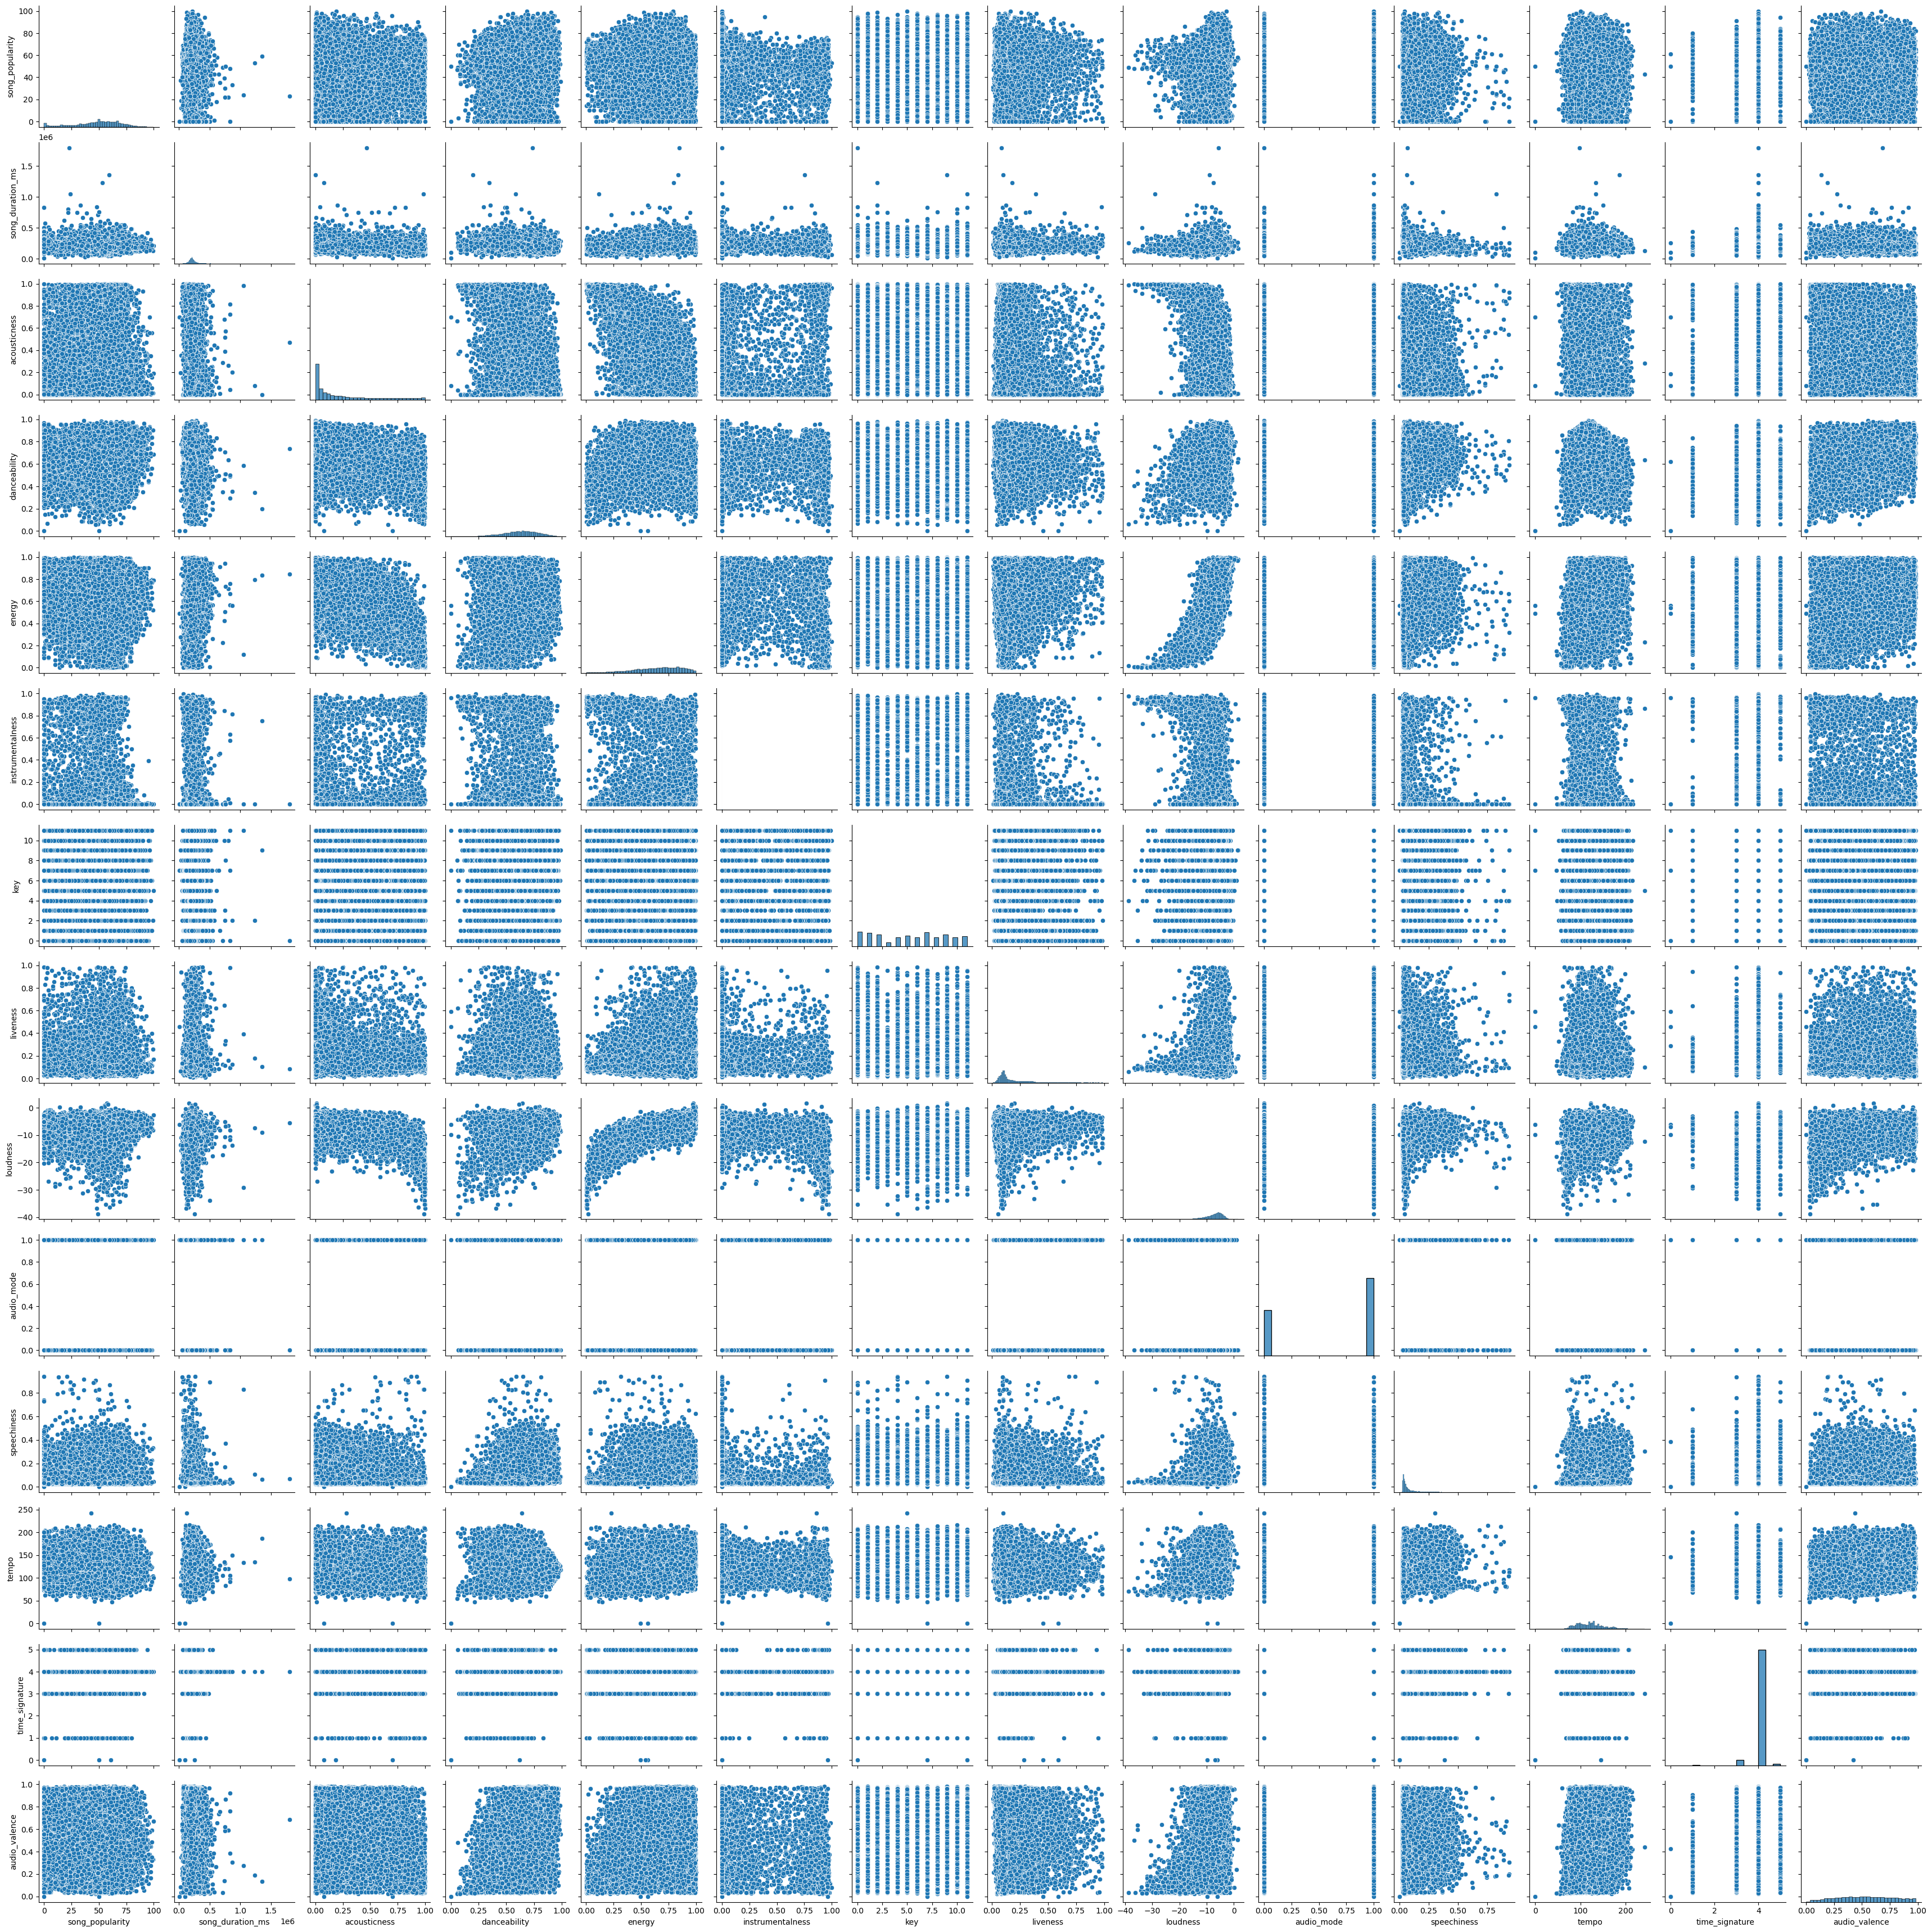

In [226]:
sns.pairplot(song)
plt.show()

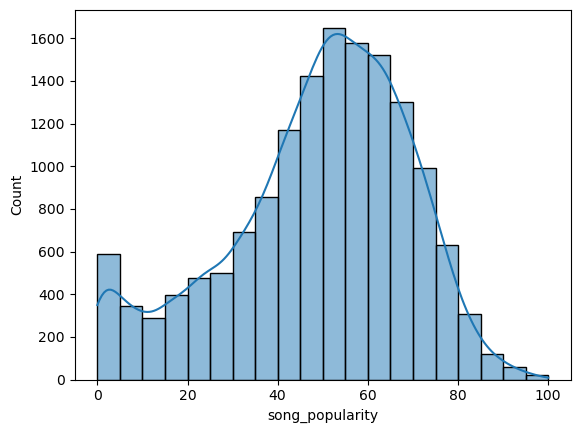

In [227]:
sns.histplot(song['song_popularity'], bins=20, kde=True)
plt.show()

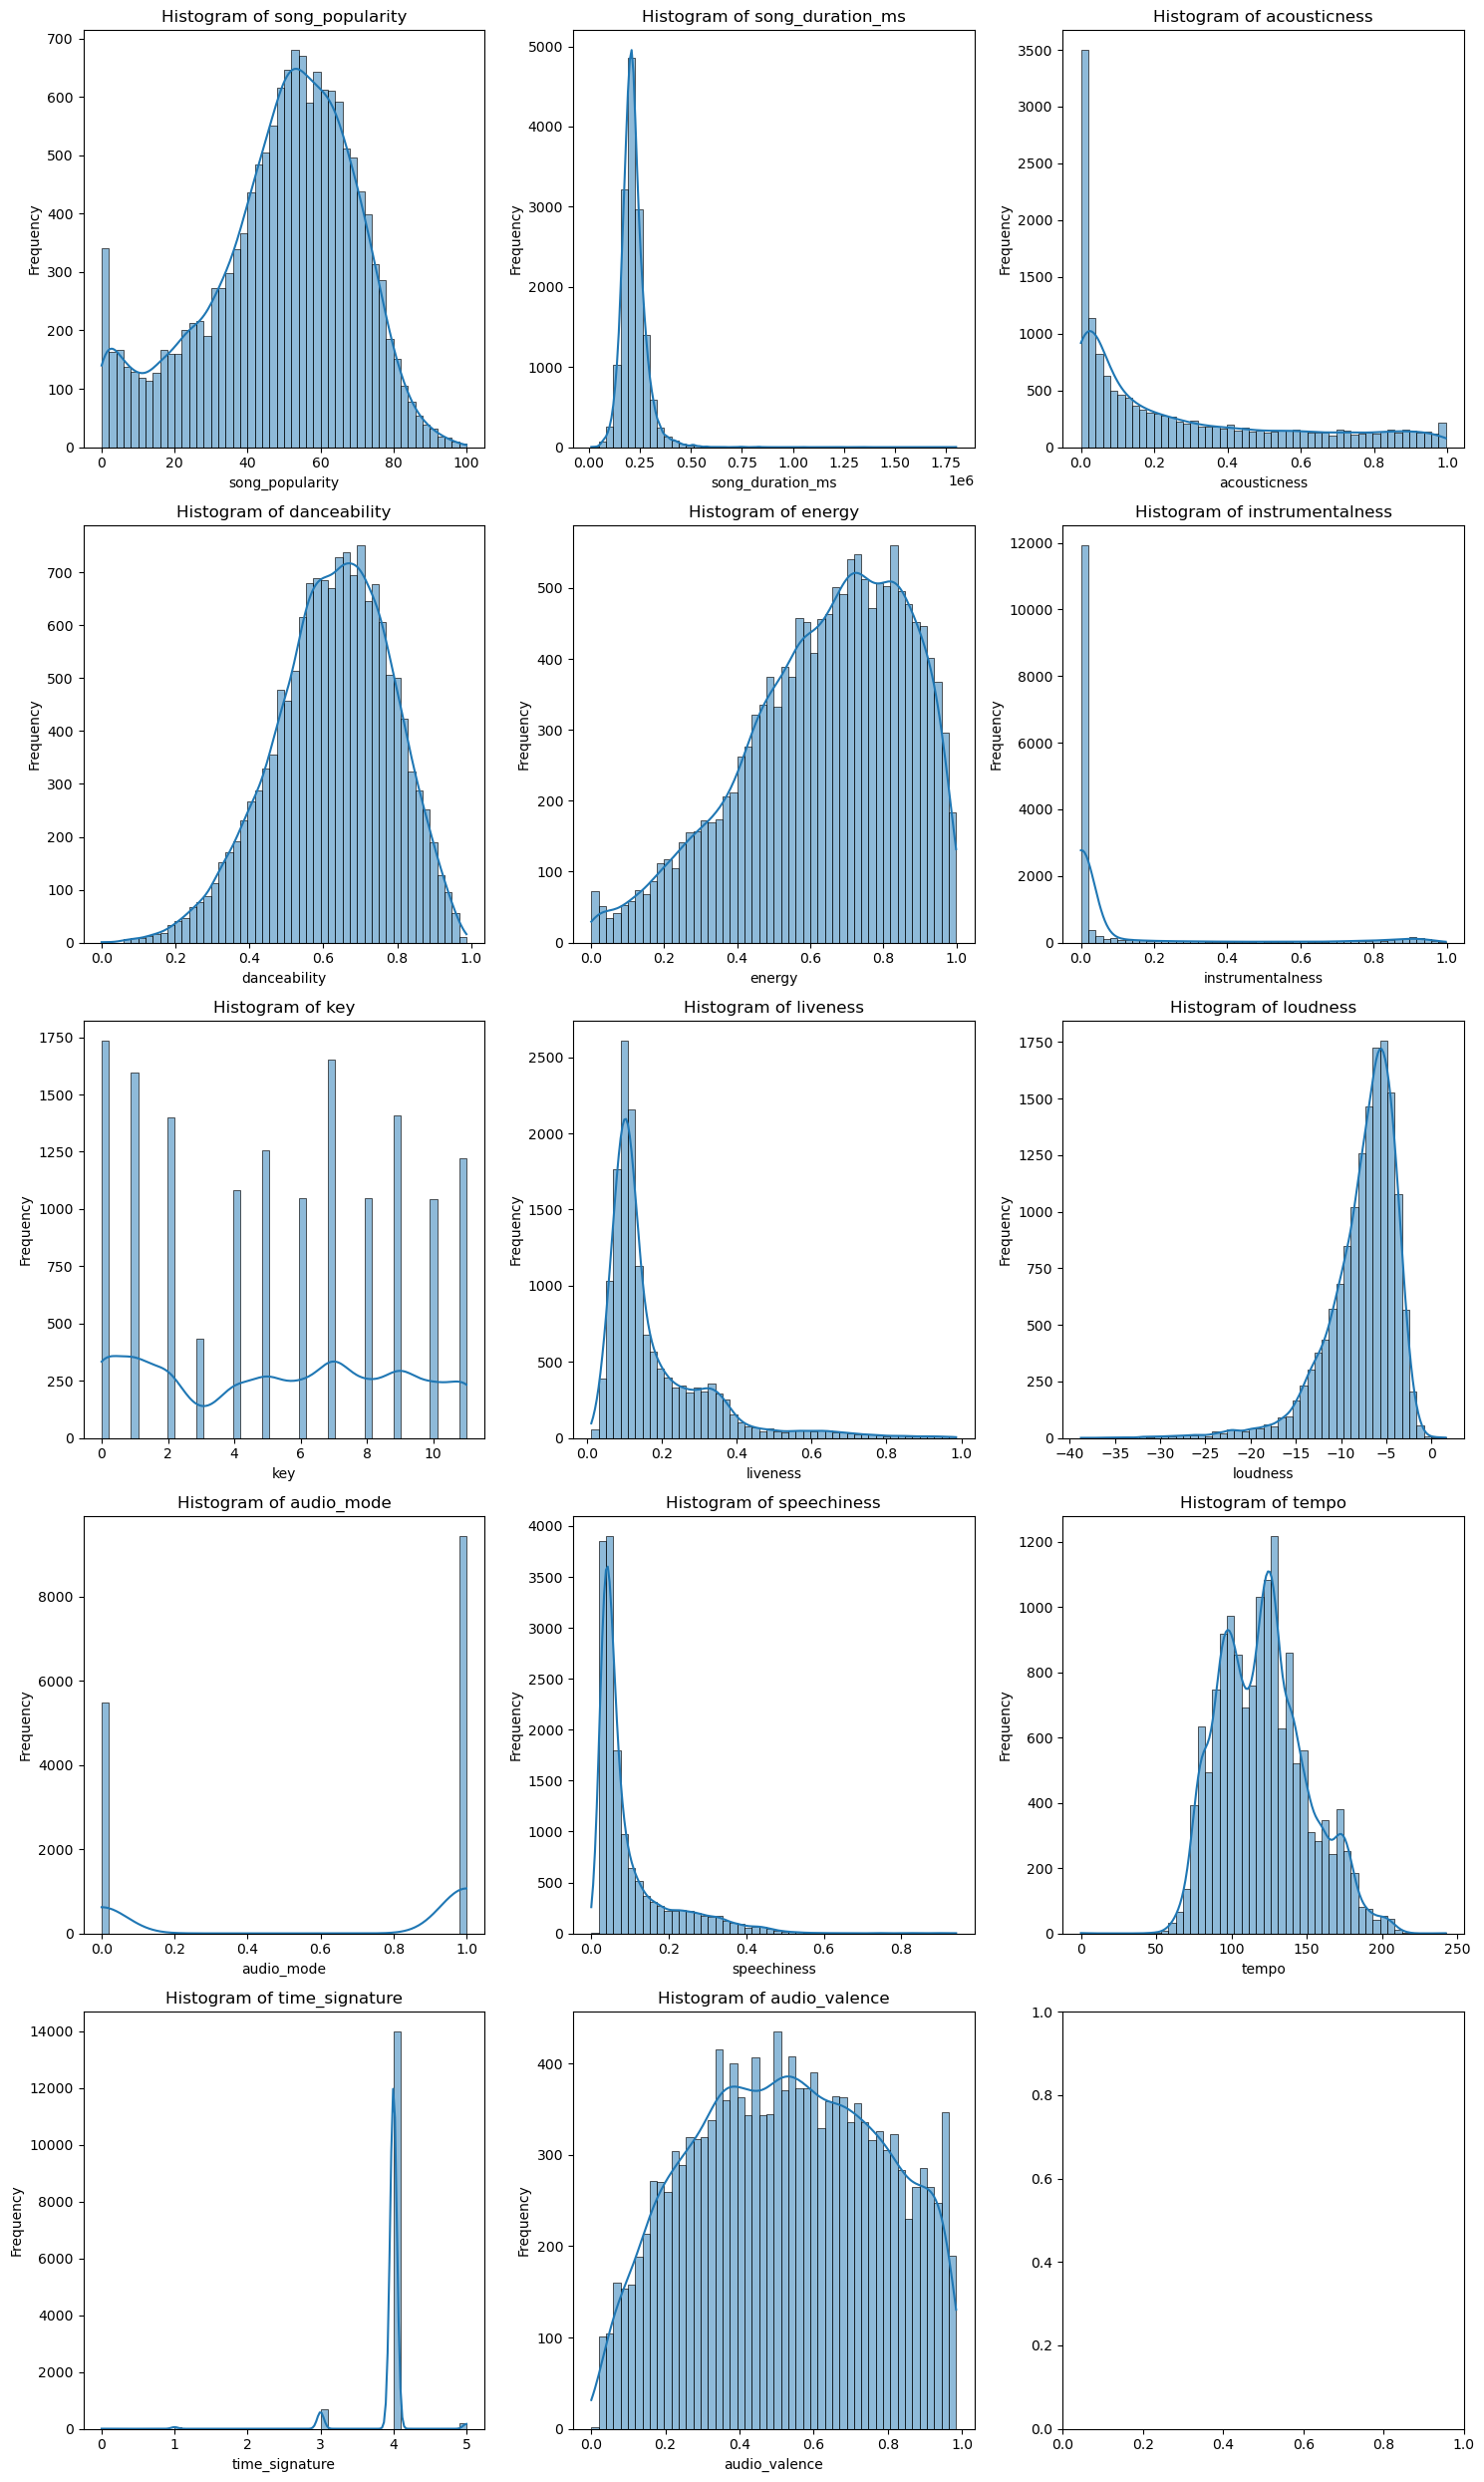

In [228]:
numeric_columns = song.select_dtypes(include='number').columns

n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(song[col], bins=50, kde=True, ax=axes[i])  
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [229]:
from scipy.stats import skew, kurtosis

numeric_columns = song.select_dtypes(include=['number']).columns

normality_results = {}

for col in numeric_columns:
    data_skewness = skew(song[col].dropna())  
    data_kurtosis = kurtosis(song[col].dropna())
    
    normality_results[col] = {'Skewness': data_skewness, 'Kurtosis': data_kurtosis}

normality_results_df = pd.DataFrame.from_dict(normality_results, orient='index')

normality_results_df['Skewness_Normality'] = normality_results_df['Skewness'].apply(lambda x: 'Normal' if -1 <= x <= 1 else 'Not Normal')
normality_results_df['Kurtosis_Normality'] = normality_results_df['Kurtosis'].apply(lambda x: 'Normal' if 2 <= x <= 4 else 'Not Normal')

print(normality_results_df)


                  Skewness   Kurtosis Skewness_Normality Kurtosis_Normality
song_popularity  -0.563049  -0.184717             Normal         Not Normal
song_duration_ms  3.399382  49.044470         Not Normal         Not Normal
acousticness      0.992819  -0.318565             Normal         Not Normal
danceability     -0.392581  -0.076909             Normal         Not Normal
energy           -0.601440  -0.255053             Normal         Not Normal
instrumentalness  2.664136   5.625737         Not Normal         Not Normal
key              -0.012113  -1.299738             Normal         Not Normal
liveness          2.216576   5.809725         Not Normal         Not Normal
loudness         -1.873451   5.961481         Not Normal         Not Normal
audio_mode       -0.547053  -1.700733             Normal         Not Normal
speechiness       2.408924   7.517827         Not Normal         Not Normal
tempo             0.431426  -0.213013             Normal         Not Normal
time_signatu

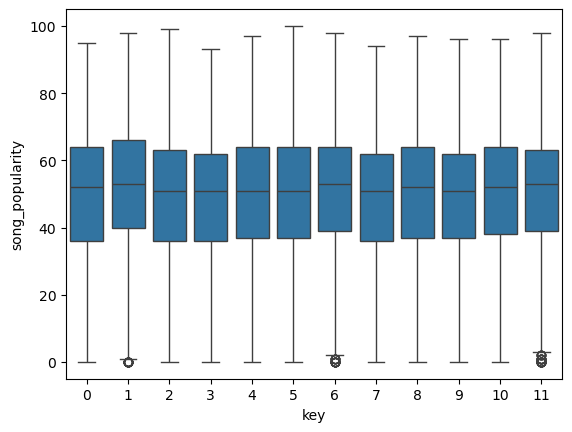

In [230]:
sns.boxplot(x='key', y='song_popularity', data=song)
plt.show()

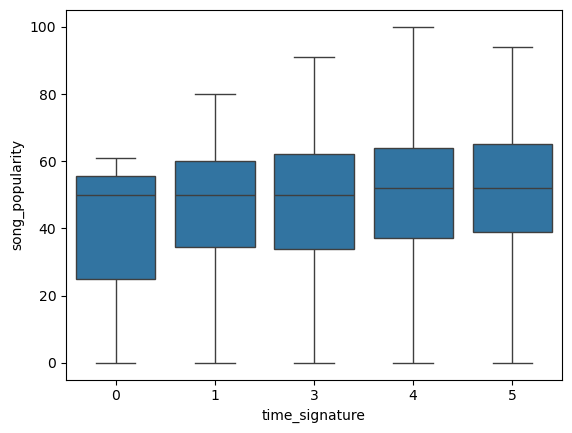

In [231]:
sns.boxplot(x='time_signature', y='song_popularity', data=song)
plt.show()

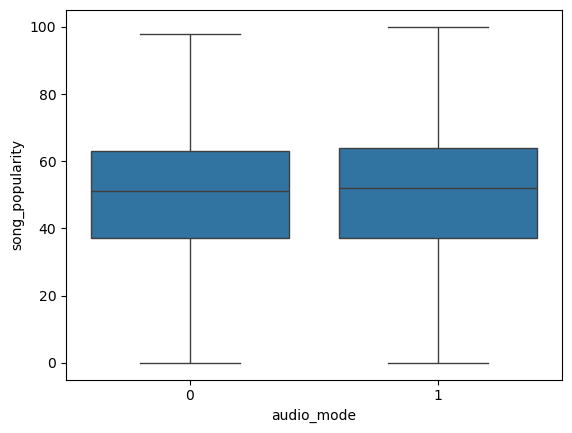

In [232]:
sns.boxplot(x='audio_mode', y='song_popularity', data=song)
plt.show()

### D. Feature Selection

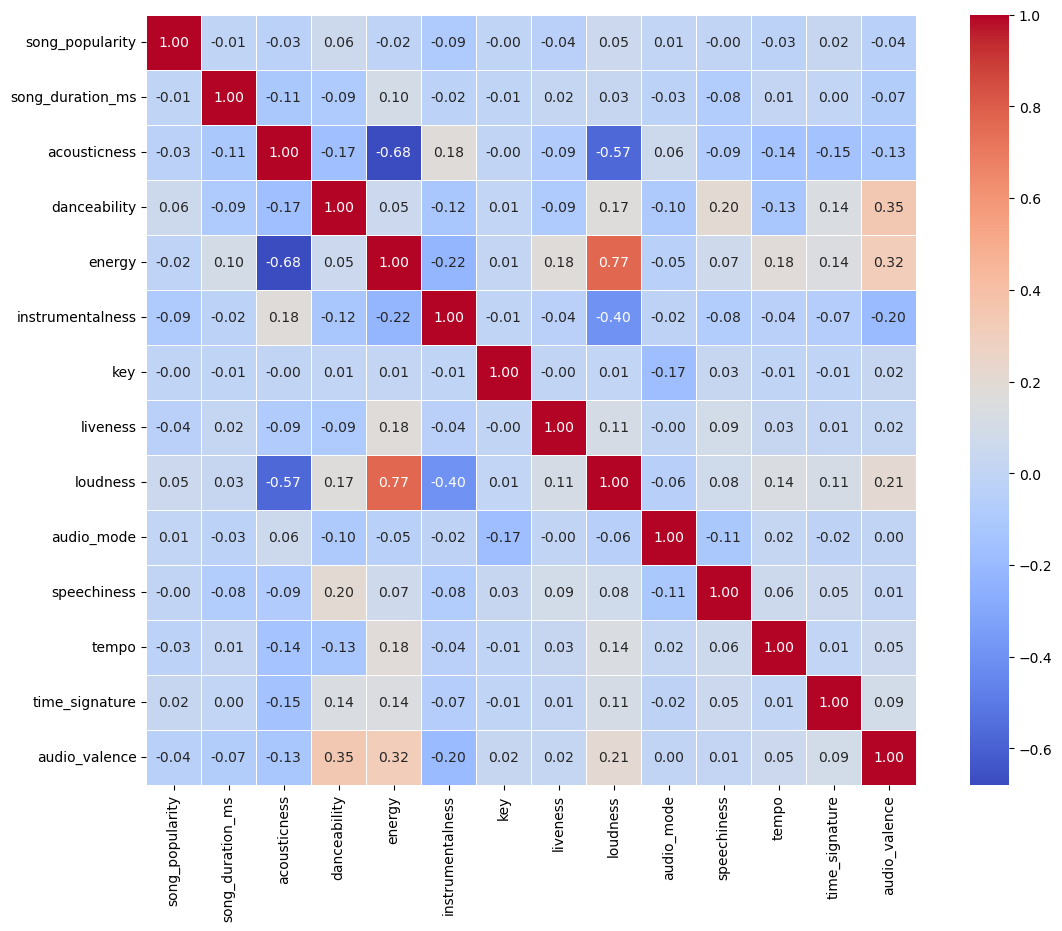

In [234]:
plt.figure(figsize=(14, 10))
corr_matrix = song.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.show()

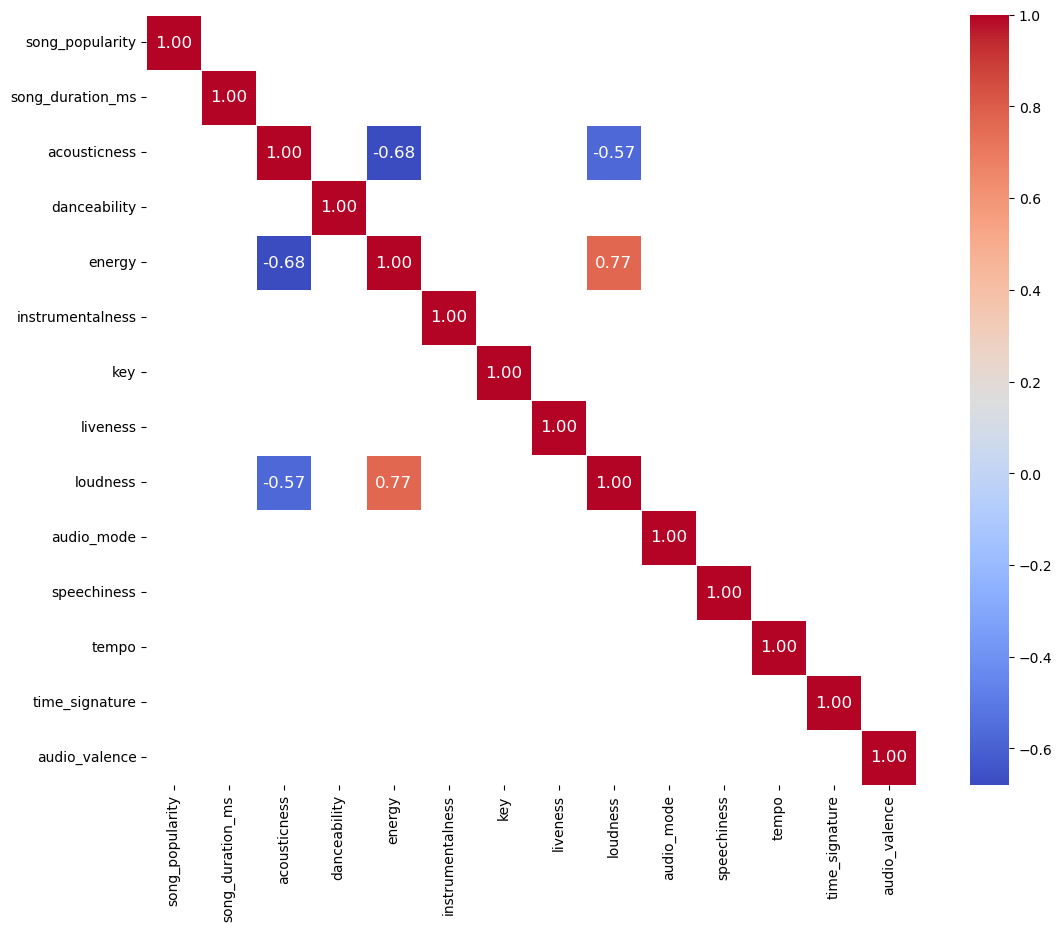

In [235]:
plt.figure(figsize=(14, 10))
threshold = 0.5
mask = np.abs(corr_matrix) < threshold
corr_matrix_filtered = corr_matrix.mask(mask)
sns.heatmap(corr_matrix_filtered, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, annot_kws={"size": 12})
plt.show()

In [236]:
song.corr(numeric_only=True)['song_popularity'].sort_values(ascending=False)
#Highest correlation to popularity score are instrumentalness, danceability, loudness

song_popularity     1.000000
danceability        0.056415
loudness            0.052114
time_signature      0.023307
audio_mode          0.008824
speechiness        -0.001971
key                -0.003878
song_duration_ms   -0.007766
energy             -0.016468
tempo              -0.029560
acousticness       -0.031658
liveness           -0.038553
audio_valence      -0.043963
instrumentalness   -0.093032
Name: song_popularity, dtype: float64

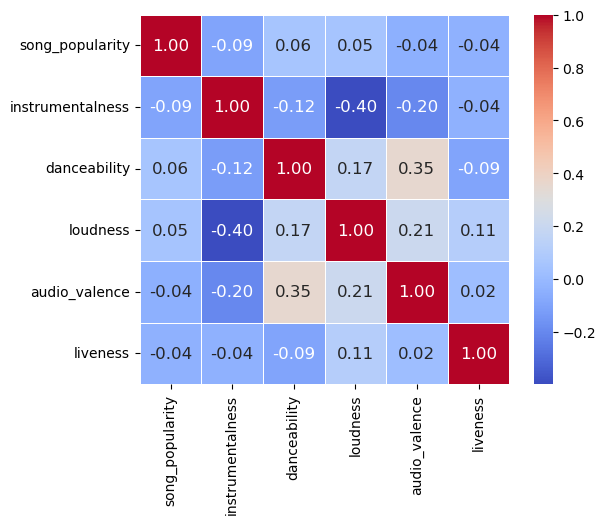

In [237]:
selected_features = ['song_popularity', 'instrumentalness', 'danceability', 'loudness','audio_valence','liveness']
corr_matrix_selected = song[selected_features].corr()
sns.heatmap(corr_matrix_selected, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, annot_kws={"size": 12})
plt.show()
#loudness and instrumentalness - relatively bigger correlation comparing to others - needs further checking for multicolinearity

In [238]:
X = song.select_dtypes(include=['number']).drop(columns=['song_popularity'])
y = song['song_popularity']

In [239]:
from sklearn.feature_selection import f_regression, SelectKBest
import pandas as pd

F_values, p_values = f_regression(X, y)

f_test_df = pd.DataFrame({
    'Feature': X.columns,
    'F-value': F_values,
    'p-value': p_values
}).sort_values(by='F-value', ascending=False)

print(f_test_df)



             Feature     F-value       p-value
4   instrumentalness  130.295446  4.705248e-30
2       danceability   47.648716  5.304152e-12
7           loudness   40.641934  1.882139e-10
12     audio_valence   28.899654  7.737288e-08
6           liveness   22.215327  2.459215e-06
1       acousticness   14.972088  1.095772e-04
10             tempo   13.051867  3.039773e-04
11    time_signature    8.111276  4.405085e-03
3             energy    4.048530  4.422775e-02
8         audio_mode    1.162127  2.810423e-01
0   song_duration_ms    0.900067  3.427792e-01
5                key    0.224408  6.357088e-01
9        speechiness    0.057973  8.097318e-01


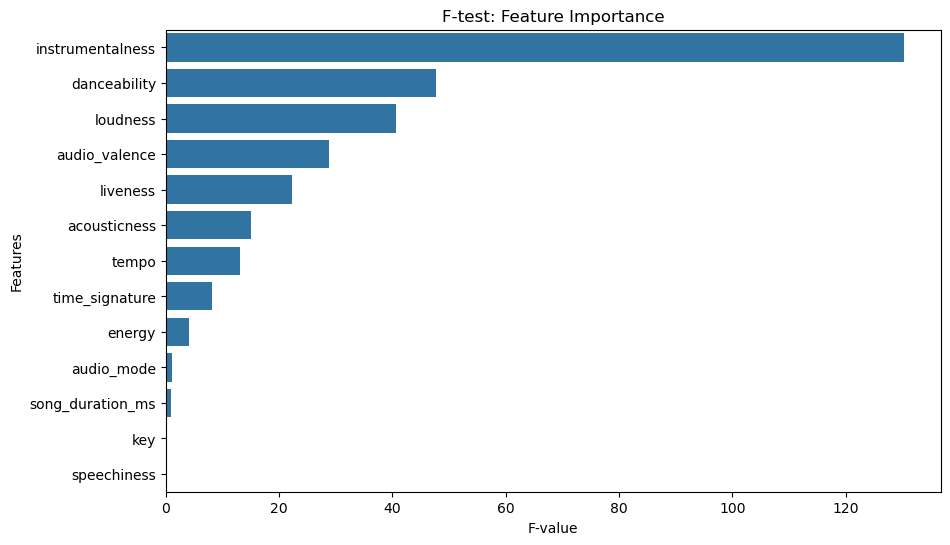

In [240]:

f_test_results = pd.DataFrame({
    'Feature': X.columns,
    'F-value': F_values,
    'p-value': p_values
}).sort_values(by='F-value', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=f_test_results['F-value'], y=f_test_results['Feature'])
plt.title('F-test: Feature Importance')
plt.xlabel('F-value')
plt.ylabel('Features')
plt.show()


In [241]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Define your features
top_features = ['instrumentalness', 'danceability', 'loudness','audio_valence','liveness','acousticness']
X_vif = song[top_features]

# Add constant for statsmodels
X_vif_with_const = sm.add_constant(X_vif)

# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_with_const.values, i + 1) for i in range(X_vif.shape[1])]

# Sort and display
print(vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True))


            Feature       VIF
0          loudness  1.744609
1      acousticness  1.502346
2  instrumentalness  1.214950
3     audio_valence  1.186992
4      danceability  1.182210
5          liveness  1.029104


In [242]:
# Define your features
features = ['instrumentalness',  'loudness']
X_vif = song[features]

# Add constant for statsmodels
X_vif_with_const = sm.add_constant(X_vif)

# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_with_const.values, i + 1) for i in range(X_vif.shape[1])]

# Sort and display
print(vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True))

            Feature       VIF
0          loudness  1.189245
1  instrumentalness  1.189245


In [243]:
#Top features have low multicolinearity at < 2

### E. Hypothesis Analysis

In [245]:
#With Instrumentalness as the most significant feature to our target variable, I will further deep dive and do hypothesis analysis to it

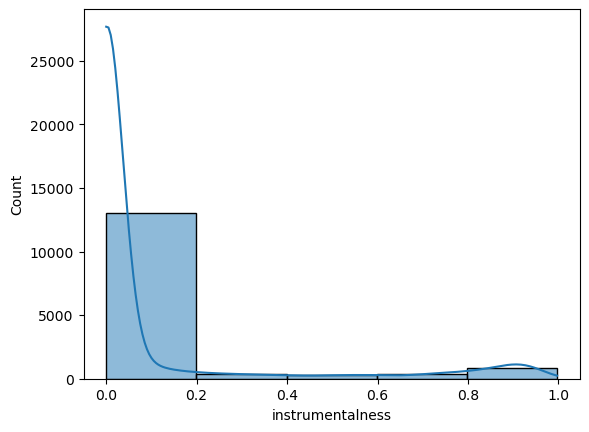

In [246]:
sns.histplot(song['instrumentalness'], bins=5, kde=True)
plt.show()

H₀ (Null): The mean popularity of tracks with instrumentalness ≤ threshold is equal to the mean popularity of tracks with instrumentalness > threshold.  
H₁ (Alt): The mean popularity of tracks with instrumentalness ≤ threshold is not equal to the mean popularity of tracks with instrumentalness > threshold

In [248]:
"""
Mann-Whitney U Test 
"""
# Define the thresholds you want to test
thresholds = [0,0.1,0.2,0.5,0.8]

# Results dictionary to store the outcomes
test_results = {}

# Perform Mann-Whitney U test for each threshold
for threshold in thresholds:
    # Create two groups based on instrumentalness
    low_instr = song[song['instrumentalness'] <= threshold]['song_popularity']
    high_instr = song[song['instrumentalness'] > threshold]['song_popularity']
    
    # Perform the Mann-Whitney U test
    u_stat, p_value = stats.mannwhitneyu(low_instr, high_instr, alternative='two-sided')
    
    # Store the results
    test_results[threshold] = {'U-statistic': u_stat, 'p-value': p_value}
    
    # Print the results
    print(f"Threshold: {threshold}")
    print(f"Mann-Whitney U: {u_stat:.2f}, p-value: {p_value:.4f}")
    print("Reject null hypothesis?" , "Yes" if p_value < 0.05 else "No")
    print("-" * 50)


Threshold: 0
Mann-Whitney U: 28915396.00, p-value: 0.0000
Reject null hypothesis? Yes
--------------------------------------------------
Threshold: 0.1
Mann-Whitney U: 16706379.50, p-value: 0.0000
Reject null hypothesis? Yes
--------------------------------------------------
Threshold: 0.2
Mann-Whitney U: 14690100.00, p-value: 0.0000
Reject null hypothesis? Yes
--------------------------------------------------
Threshold: 0.5
Mann-Whitney U: 11124255.00, p-value: 0.0000
Reject null hypothesis? Yes
--------------------------------------------------
Threshold: 0.8
Mann-Whitney U: 6896490.50, p-value: 0.0000
Reject null hypothesis? Yes
--------------------------------------------------


In [249]:
"""
T Test
"""

# Define the thresholds
thresholds = [0,0.1,0.2, 0.5, 0.8]

# Results dictionary to store the outcomes
test_results_ttest = {}

# Perform T-test for each threshold
for threshold in thresholds:
    # Create two grou0ps based on instrumentalness
    low_instr = song[song['instrumentalness'] <= threshold]['song_popularity']
    high_instr = song[song['instrumentalness'] > threshold]['song_popularity']
    
    # Perform the T-test
    t_stat, p_value = stats.ttest_ind(low_instr, high_instr, equal_var=False)
    
    # Store the results
    test_results_ttest[threshold] = {'T-statistic': t_stat, 'p-value': p_value}
    
    # Print the results
    print(f"Threshold: {threshold}")
    print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
    print("Reject null hypothesis?" , "Yes" if p_value < 0.05 else "No")
    print("-" * 50)


Threshold: 0
T-statistic: 13.40, p-value: 0.0000
Reject null hypothesis? Yes
--------------------------------------------------
Threshold: 0.1
T-statistic: 13.62, p-value: 0.0000
Reject null hypothesis? Yes
--------------------------------------------------
Threshold: 0.2
T-statistic: 13.70, p-value: 0.0000
Reject null hypothesis? Yes
--------------------------------------------------
Threshold: 0.5
T-statistic: 11.75, p-value: 0.0000
Reject null hypothesis? Yes
--------------------------------------------------
Threshold: 0.8
T-statistic: 6.89, p-value: 0.0000
Reject null hypothesis? Yes
--------------------------------------------------


There is statistically significant evidence that the popularity of songs changes depending on whether their instrumentalness is above or below each threshold (0.2, 0.5, 0.8).

This implies:

Instrumentalness is strongly associated with popularity.

Regardless of the threshold used, the distribution and mean popularity differ significantly between "low" and "high" instrumentalness groups.

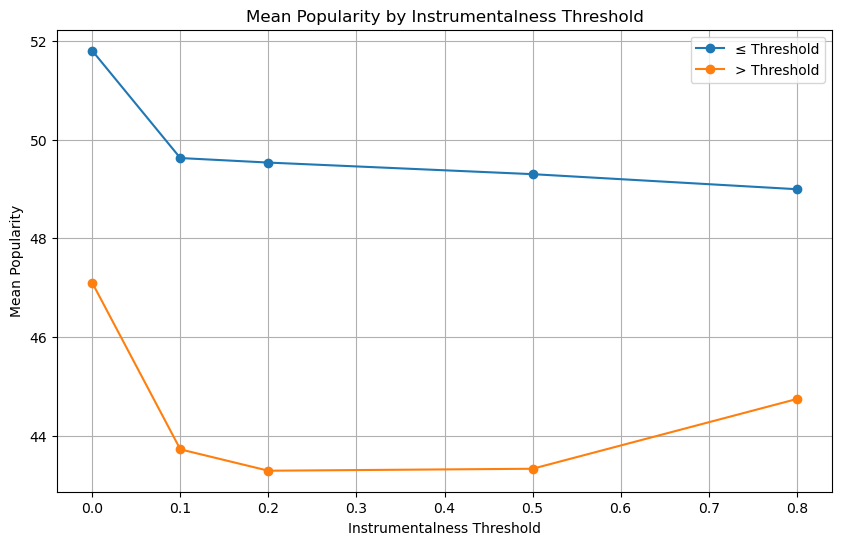

In [251]:

# Define thresholds to test
thresholds = [0,0.1,0.2, 0.5, 0.8]

# Lists to store mean popularity values
mean_low, mean_high = [], []

# Calculate mean popularity for each threshold
for threshold in thresholds:
    low_group = song[song['instrumentalness'] <= threshold]['song_popularity']
    high_group = song[song['instrumentalness'] > threshold]['song_popularity']
    
    mean_low.append(low_group.mean())
    mean_high.append(high_group.mean())

# Plot mean popularity by group
plt.figure(figsize=(10, 6))
plt.plot(thresholds, mean_low, marker='o', label='≤ Threshold')
plt.plot(thresholds, mean_high, marker='o', label='> Threshold')
plt.title('Mean Popularity by Instrumentalness Threshold')
plt.xlabel('Instrumentalness Threshold')
plt.ylabel('Mean Popularity')
plt.legend()
plt.grid(True)
plt.show()


### F. Predictive Analysis - Linear Regression

Ridge R²: 0.016349287476218777
Best alpha (Ridge): 187.3817422860383
Ridge Coefficients:
  instrumentalness: -1.8456
  danceability: 1.3701
  loudness: 0.6210
  audio_valence: -1.8003
  liveness: -0.8120
  acousticness: -0.0833
  tempo: -0.4255

Lasso R²: 0.016311540711310024
Best alpha (Lasso): 0.014174741629268055
Lasso Coefficients:
  instrumentalness: -1.8666
  danceability: 1.3881
  loudness: 0.6173
  audio_valence: -1.8225
  liveness: -0.8080
  acousticness: -0.0663
  tempo: -0.4124


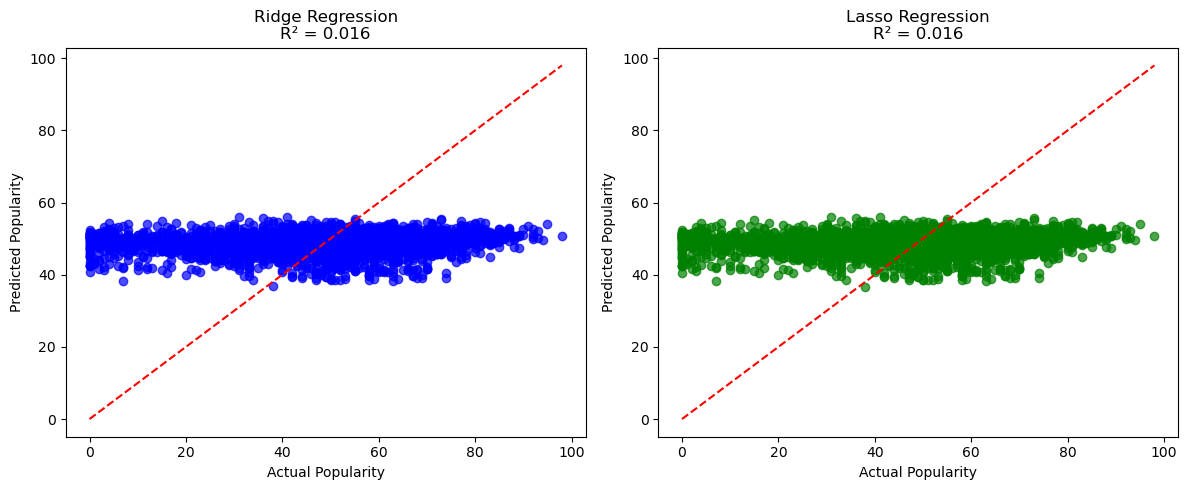

In [285]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Define your selected features
your_selected_features = ['instrumentalness', 'danceability', 'loudness','audio_valence','liveness','acousticness','tempo']  

# 2. Prepare X and y
X = song[your_selected_features]
y = song['song_popularity']

# 3. Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Fit Ridge Regression
ridge = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge.fit(X_train, y_train)
ridge_r2 = ridge.score(X_test, y_test)
ridge_pred = ridge.predict(X_test)

# 6. Fit Lasso Regression
lasso = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, max_iter=10000)
lasso.fit(X_train, y_train)
lasso_r2 = lasso.score(X_test, y_test)
lasso_pred = lasso.predict(X_test)

# 7. Print Results
print("Ridge R²:", ridge_r2)
print("Best alpha (Ridge):", ridge.alpha_)
print("Ridge Coefficients:")
for feat, coef in zip(your_selected_features, ridge.coef_):
    print(f"  {feat}: {coef:.4f}")

print("\nLasso R²:", lasso_r2)
print("Best alpha (Lasso):", lasso.alpha_)
print("Lasso Coefficients:")
for feat, coef in zip(your_selected_features, lasso.coef_):
    print(f"  {feat}: {coef:.4f}")

# 8. Plot Actual vs Predicted
plt.figure(figsize=(12, 5))

# Ridge plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title(f'Ridge Regression\nR² = {ridge_r2:.3f}')

# Lasso plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title(f'Lasso Regression\nR² = {lasso_r2:.3f}')

plt.tight_layout()
plt.show()